<h3>
Universidade Federal da Paraíba<br>
Centro de Informática<br>
Bacharelado em Ciência de Dados e Inteligência Artificial<br>
Disciplina: Séries Temporais<br>
Discentes: Guilheme Iram, Maxwel Barbosa<br>
<h3>

## Análise Exploratória dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
from IPython.display import display, HTML

In [2]:
styles = """
<style>
.output {
    display: flex;
    justify-content: center;
}
</style>
"""

display(HTML(styles))

In [3]:
df = pd.read_csv('../data/gold_price_data.csv', index_col='Date', parse_dates=True)

In [4]:
df.describe()

,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [5]:
df[df.Value == df.Value.max()]

,Value
Date,
2011-09-05,1895.0
2011-09-06,1895.0


In [6]:
fig = px.box(data_frame=df, y= df.Value, title='Boxplot do preço do ouro')
fig.update_layout(yaxis_title='Valor em U$')

fig.show()

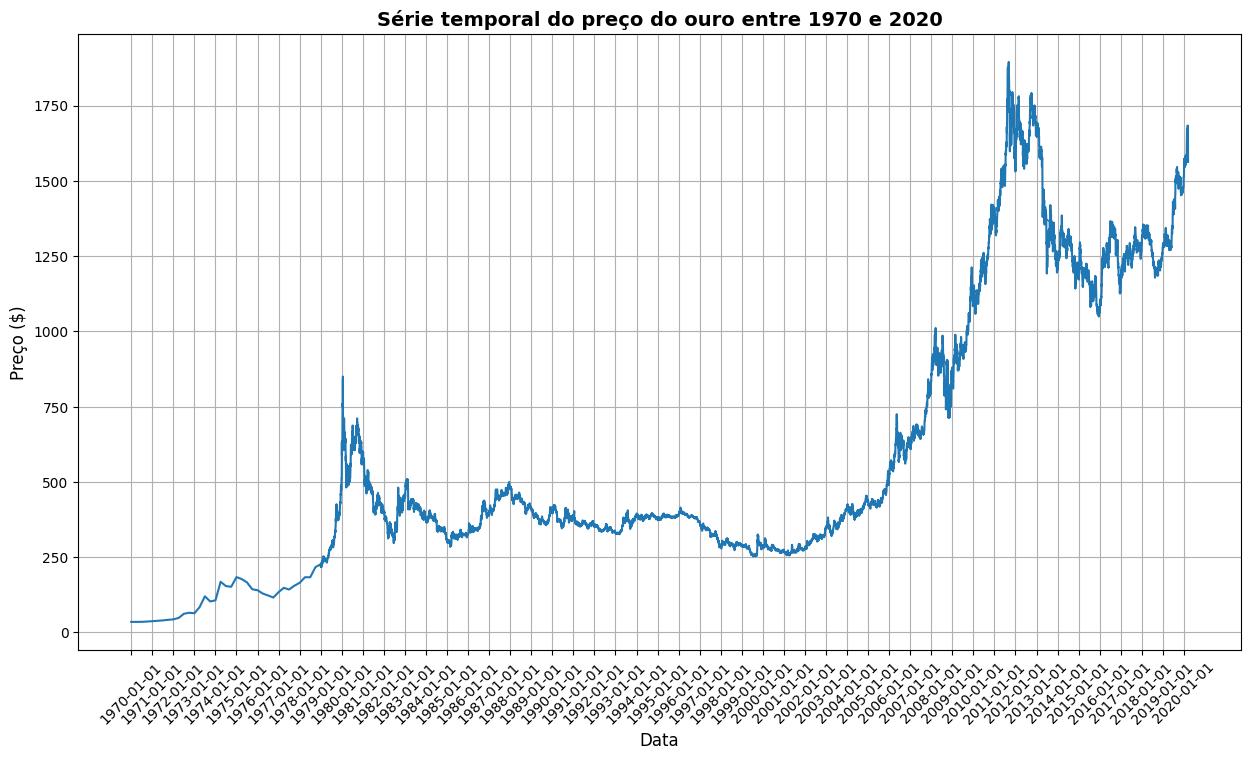

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(df)

plt.title('Série temporal do preço do ouro entre 1970 e 2020', fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço ($)', fontsize=12)
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='YS'), rotation=45)
plt.grid(True)
plt.savefig('../img/gold_price_time_series.png')
#plt.show()


In [8]:

fig = px.line(data_frame=df, y='Value', title='Série temporal do preço do ouro entre 1970 e 2020', width=1200, height=500)

fig.update_layout(xaxis_title='Data', yaxis_title='Valor em U$')
fig.show()

In [9]:
# Decomposição da série temporal em tendência, sazonalidade e resíduos
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=365)

# Obtendo as partes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

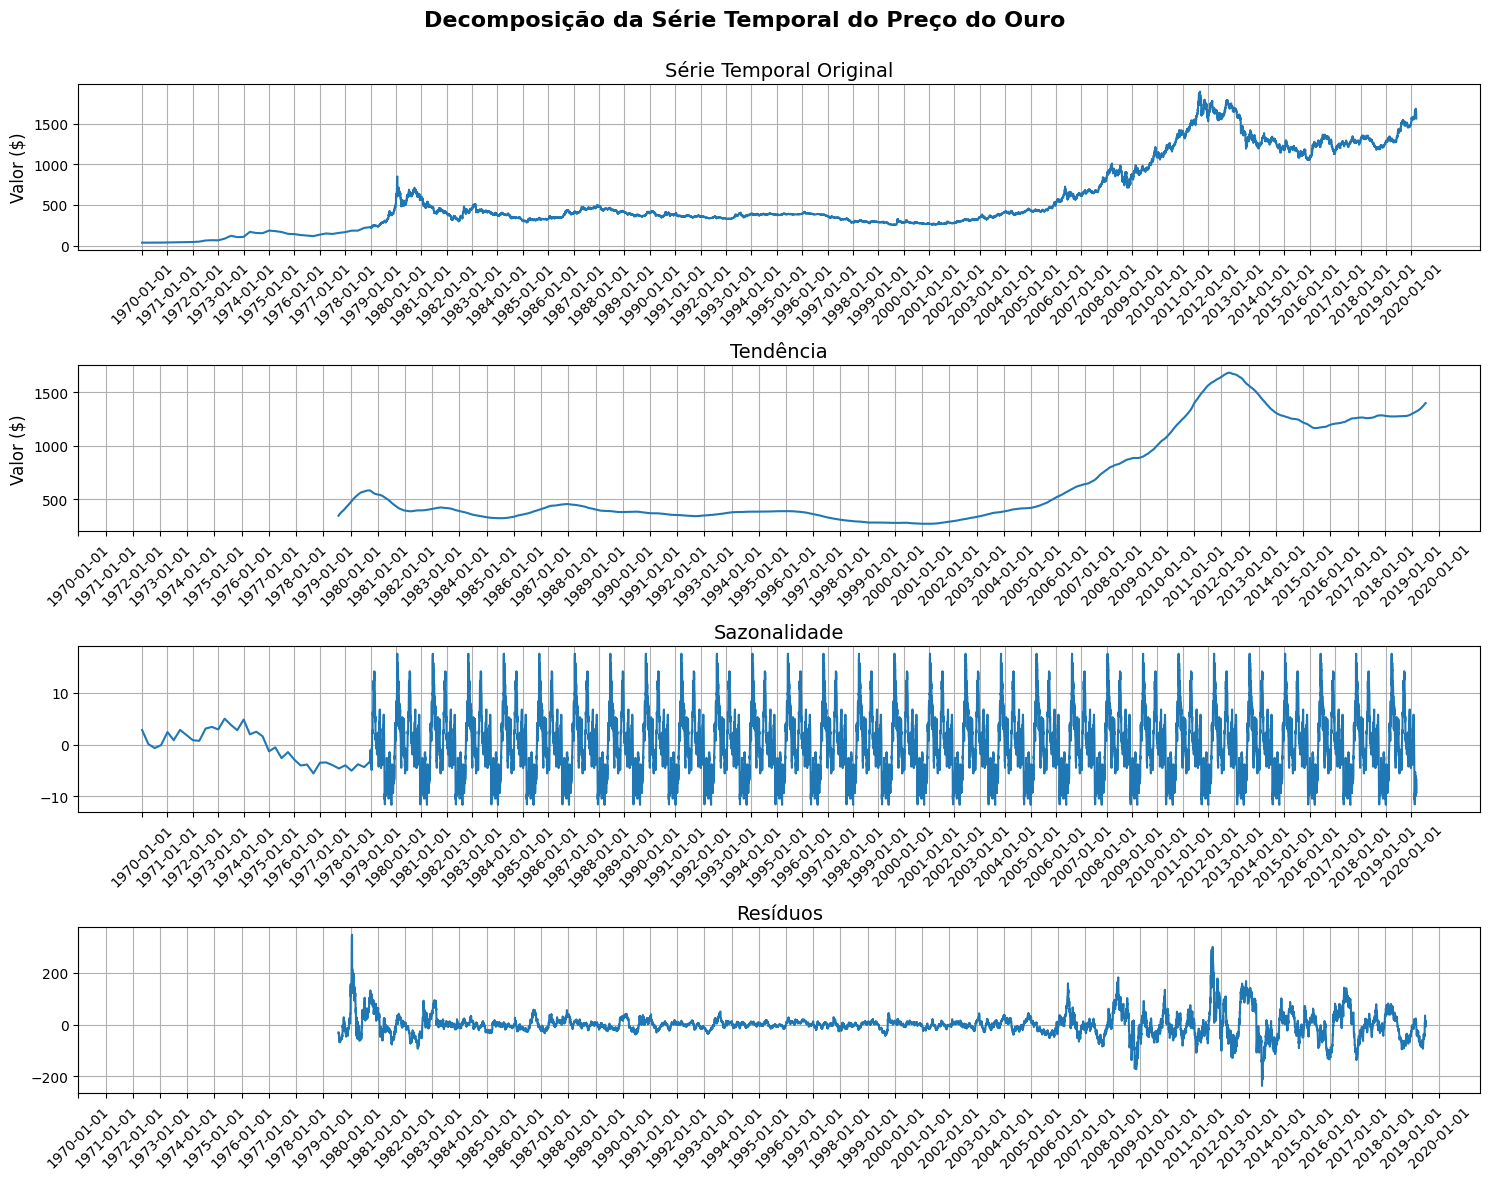

In [10]:
plt.figure(figsize=(15, 12))

# Série Temporal Original
plt.subplot(4, 1, 1)
plt.plot(df)
plt.title('Série Temporal Original', fontsize=14)
plt.ylabel('Valor ($)', fontsize=12)
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Tendência
plt.subplot(4, 1, 2)
plt.plot(trend)
plt.title('Tendência', fontsize=14)
plt.ylabel('Valor ($)', fontsize=12)
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Sazonalidade
plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.title('Sazonalidade', fontsize=14)
# plt.ylabel('Valor', fontsize=12)
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Resíduos
plt.subplot(4, 1, 4)
plt.plot(residual)
plt.title('Resíduos', fontsize=14)
# plt.ylabel('Valor', fontsize=12)
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Ajustar o intervalo do eixo x para mostrar todos os anos


# Título maior para a figura
plt.suptitle('Decomposição da Série Temporal do Preço do Ouro\n', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('../img/gold_price_time_series_decomposition.png')
plt.show()